In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

 Trabajaremos con el csv que generamos en el ejercicio de pair programming de Pandas V

1. Usando la librería seaborn, cread una gráfica que nos muestre el número de personas que han hecho una solicitud de ticket en cada año. Hacedlo solo para los del tipo "Problema".

In [2]:
df_empleados = pd.read_csv("datos/puestos-empleados.csv", index_col=0) #traemos el archivo empleados-puestos
df_empleados.head(1)

,id_puesto,puesto,departamento,tipo_puesto,turno,id_empleado,email,nombre_completo
0,10-23200,Ingeniero de Materiales,MATERIALES,Operativo,NaN,725,eliana .villa@tractchun.com,Eliana Villa


In [3]:
df_tiquets= pd.read_csv("datos/tiquets.csv", index_col=0) #traemos el archivo tiquets
df_tiquets.sample(10)

/home/adalaber/Descargas/anaconda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id_ticket,id_empleado,id_agente,categoría,tipo,severidad,prioridad,dias_resolucion,satisfaccion,semestre,año,mes
38227,NaN,694.0,42.0,Hardware,Solicitud,2 - Normal,1 - Baja,13.0,5.0,2º semestre,2018,September
64862,NaN,622.0,9.0,Sistema,Solicitud,2 - Normal,0 - Sin Asignar,6.0,5.0,2º semestre,2019,July
53981,NaN,178.0,10.0,Hardware,Solicitud,2 - Normal,0 - Sin Asignar,16.0,3.0,1er semestre,2019,April
13803,NaN,1048.0,34.0,Sistema,Solicitud,2 - Normal,0 - Sin Asignar,5.0,5.0,1er semestre,2017,May
81438,NaN,1912.0,22.0,Sistema,Solicitud,2 - Normal,3 - Alta,2.0,5.0,2º semestre,2020,August
38176,NaN,1608.0,22.0,Sistema,Problema,2 - Normal,1 - Baja,16.0,3.0,2º semestre,2018,August
78070,NaN,273.0,16.0,Software,Solicitud,2 - Normal,0 - Sin Asignar,5.0,3.0,2º semestre,2020,November
8877,SHLTET-2142664342,1444.0,33.0,Hardware,Solicitud,2 - Normal,3 - Alta,5.0,4.0,2º semestre,2016,October
17955,NaN,159.0,45.0,Acceso/Login,Solicitud,2 - Normal,0 - Sin Asignar,0.0,4.0,2º semestre,2017,October
90520,NaN,1828.0,6.0,Sistema,Problema,2 - Normal,1 - Baja,5.0,4.0,1er semestre,2020,April


In [4]:
df_prob = df_tiquets[df_tiquets['tipo'] == 'Problema'] #extraemos de la columna tipo las filas con problema
df_prob.sample(5)

,id_ticket,id_empleado,id_agente,categoría,tipo,severidad,prioridad,dias_resolucion,satisfaccion,semestre,año,mes
7068,KMRESR-7142574822,2.0,48.0,Sistema,Problema,1 - Menor,2 - Media,1.0,4.0,2º semestre,2016,July
44400,NaN,931.0,17.0,Sistema,Problema,2 - Normal,3 - Alta,2.0,5.0,1er semestre,2018,February
3685,GWRESR-0242662563,456.0,5.0,Sistema,Problema,1 - Menor,1 - Baja,2.0,5.0,2º semestre,2016,October
73972,NaN,1445.0,44.0,Acceso/Login,Problema,3 - Mayor,3 - Alta,0.0,5.0,1er semestre,2020,April
10538,TDLENR-6042547687,1898.0,6.0,Acceso/Login,Problema,2 - Normal,0 - Sin Asignar,0.0,4.0,1er semestre,2016,June


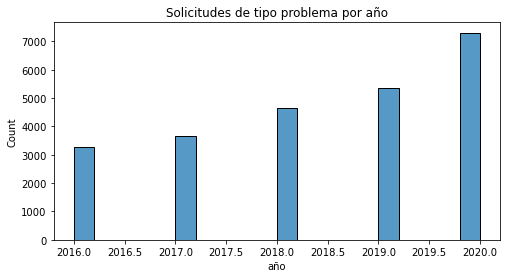

In [5]:
plt.figure(figsize =(8,4)) 

fig = sns.histplot(x = 'año' ,data=df_prob)

fig.set_title('Solicitudes de tipo problema por año')

plt.show()

2. La gráfica anterior nos ha mostrado una tendencia ascendente en el número de solicitudes a lo largo de los años, lo que preocupa a la empresa, por lo que quieres seguir analizando los datos para ver si son capaces de identificar los problemas subyacentes a estas solicitudes. Para esto, quieren saber si hay diferencias a lo largo del año. En concreto nos piden que hagamos un subplot con seaborn donde:

- En la primera gráfica tengamos la gráfica que creamos en el ejercicio anterior

- En la segunda gráfica tengamos la comparación por años y sementres para el número de tikects de tipo "Problema".

<AxesSubplot:xlabel='año', ylabel='Count'>

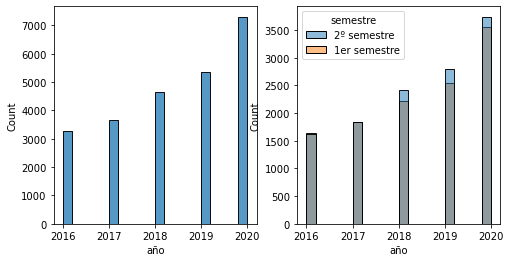

In [9]:
fig, ax = plt.subplots(1,2, figsize=(8,4))

sns.histplot(x='año', data = df_prob, ax= ax[0])
sns.histplot(x='año', data = df_prob, ax= ax[1], hue= 'semestre')



3. La empresa se siente algo aliviada al ver que no hay diferencias entre semestres, pero seguimos sin identificar porque cada año tenemos más solicitudes. Nuestras jefas quieren saber ahora, que prioridad tienen los tickets que tenemos en el conjunto de datos. Por eso nos piden que volvamos a hacer un subplot:

- En la primera gráfica deberíamos tener la gráfica creada en el ejercicio 1

- En la segunda gráfica deberíamos incluir el número de tickets por año en función de la prioridad que tienen.

<AxesSubplot:xlabel='año', ylabel='Count'>

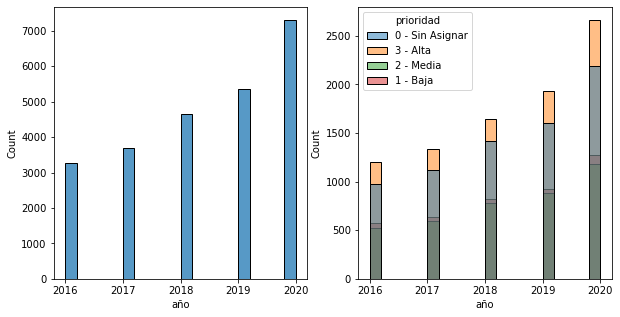

In [11]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

sns.histplot(x='año', data = df_prob, ax= ax[0])
sns.histplot(x='año', data = df_prob, ax= ax[1], hue= 'prioridad')

4. Hasta ahora hemos estado viendo que no parece que haya nada alarmante. Por lo que ahora quieren que evaluemos la cantidad de trabajo que cada empleado esta haciendo, para poder identificar rápidamente un problema en la distribución de tareas y tomar medidas para solucionarlo. Para ello nos piden que hagamos dos gráficas en un subplot:

- La primera gráfica tiene que tener los 5 empleados con mayor número de tickets, deberemos mostrar quienes son y cuál es total de tickets que atienden cada uno.

- La primera gráfica tiene que tener los 5 empleados con menor número de tickets, deberemos mostrar quienes son y cuál es total de tickets que atienden cada uno.

📌 NOTA Somos analistas y no nos vale con sacar las gráficas. Incluid una celda de markdown donde expliqueis que es lo que estamos viendo en las gráficas, es decir, haced una interpretación de los resultados.